# Decision Tree for Predictive Modeling

You work for a data-driven company that focuses on predicting customer satisfaction and sales for a retail business. Your task is to build predictive models using decision trees. The dataset contains various customer attributes, shopping behavior, and survey responses. Answer the following questions based on this case study:

1. Data Exploration:

a. Load the dataset using Python libraries like pandas and explore its structure. Describe the features, target variables, and data distribution.

b. Discuss the importance of customer satisfaction and sales prediction in the retail business context.

2. Classification Task Predicting Customer Satisfaction:

a. Implement a decision tree classifier using Python libraries like scikit-learn to predict customer satisfaction.

b. Split the dataset into training and testing sets and train the model.

c. Evaluate the classification model's performance using relevant metrics such as accuracy, precision, recall, and F1-score.

3. Regression Task - Predicting Sales:

a. Implement a decision tree regression model using Python libraries to predict sales based on customer attributes and behavior.

b. Discuss the differences between classification and regression tasks in predictive modeling.

c. Split the dataset into training and testing sets and train the regression model.

d. Evaluate the regression model's performance using metrics such as mean squared error (MSE) and R- squared.

4. Decision Tree Visualization:

a. Visualize the decision tree for both the classification and regression models. Discuss the interpretability of decision trees in predictive modeling.

5. Feature Importance:

a. Determine the most important features in both models by examining the decision tree structure. Discuss how feature importance is calculated in decision trees.

6. Overfitting and Pruning:

a. Explain the concept of overfitting in the context of decision trees.

b. Discuss methods for reducing overfitting, such as pruning, minimum samples per leaf, and maximum depth.

c. Implement pruning or other techniques as necessary and analyze their impact on the model's performance.

7. Real-World Application:

a. Describe the practical applications of customer satisfaction prediction and sales forecasting in the retail industry.

b. Discuss the potential benefits of using predictive models in retail business operations and decision- making.

8. Model Comparison:

a. Compare the performance of the decision tree classification and regression models.

b. Discuss the trade-offs, advantages, and limitations of decision trees for different types of predictive tasks.

9. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail business. Highlight the significance of predictive modeling and the insights gained from decision tree models.

In this case study, you are required to demonstrate your ability to use decision trees for both classification and regression tasks, understand the importance of feature selection and pruning, and communicate the practical applications of predictive modeling in a real-world context.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('decision.csv')
data.head()

,CustomerID,Age,Income,ShoppingBehaviour,PurchaseAmount,SurveyResponse
0,1,28,45000,1,150,1
1,2,35,60000,0,100,0
2,3,40,75000,0,50,1
3,4,22,30000,0,30,0
4,5,50,90000,1,200,1


customer satisfaction and sales prediction are essential for retail businesses to thrive, improve customer loyalty, and achieve long-term success. Accurate predictive models can guide retailers in making informed decisions to meet customer expectations and achieve their business goals.

In [3]:
data.isna().sum()

CustomerID            0
 Age                  0
 Income               0
 ShoppingBehaviour    0
 PurchaseAmount       0
 SurveyResponse       0
dtype: int64

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': ' Age'}>],
       [<Axes: title={'center': ' Income'}>,
        <Axes: title={'center': ' ShoppingBehaviour'}>],
       [<Axes: title={'center': ' PurchaseAmount'}>,
        <Axes: title={'center': ' SurveyResponse'}>]], dtype=object)

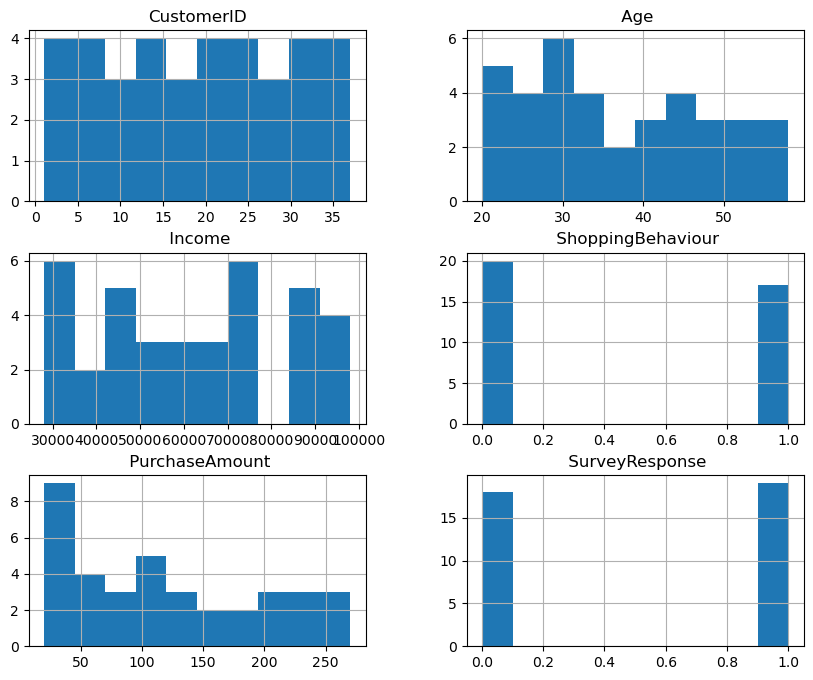

In [5]:
data.hist(figsize=(10,8))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   CustomerID          37 non-null     int64
 1    Age                37 non-null     int64
 2    Income             37 non-null     int64
 3    ShoppingBehaviour  37 non-null     int64
 4    PurchaseAmount     37 non-null     int64
 5    SurveyResponse     37 non-null     int64
dtypes: int64(6)
memory usage: 1.9 KB


In [7]:
x=data.iloc[:,:-1]
x.head()


,CustomerID,Age,Income,ShoppingBehaviour,PurchaseAmount
0,1,28,45000,1,150
1,2,35,60000,0,100
2,3,40,75000,0,50
3,4,22,30000,0,30
4,5,50,90000,1,200


In [8]:
y=data.iloc[:,-1:]
y.head()

,SurveyResponse
0,1
1,0
2,1
3,0
4,1


# Split the data for training & testing

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (27, 5)

Training data-y- Shape:	 (27, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (10, 5)

Testing data(y-Outcome) Shape:	 (10, 1)


In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)


****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 1 0 0 1 0 0 0 1 0]

Testing completed
****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.9
Confusion Matric:
 [[6 0]
 [1 3]]
Classification Report
               precision    reca

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_reg= DecisionTreeRegressor(random_state=42)
dt_reg.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = dt_reg.predict(xtest)

# Evaluate the model's performance
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

Mean Squared Error (MSE): 0.10
R-squared (R^2): 0.58


# Classification and regression are both types of predictive modeling, but they differ in their goals and the types of output they produce:

Classification is used when the target variable is categorical or consists of classes. The goal is to assign each data point to one of these classes. Example problems include email spam detection (spam or not spam), image classification (cat or dog), and sentiment analysis (positive, negative, neutral).

Regression, on the other hand, is used when the target variable is continuous and numerical. The goal is to predict a numerical value. Examples of regression tasks include predicting sales, housing prices, temperature, or any variable that can take a wide range of real-number values.

[Text(0.5, 0.75, 'x[2] <= 64000.0\ngini = 0.494\nsamples = 27\nvalue = [12, 15]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]')]

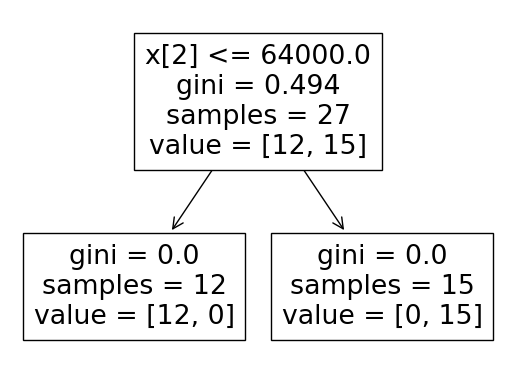

In [12]:
from sklearn import tree
tree.plot_tree(dt_clf)

[Text(0.5, 0.75, 'x[1] <= 36.5\nsquared_error = 0.247\nsamples = 27\nvalue = 0.556'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 12\nvalue = 0.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 15\nvalue = 1.0')]

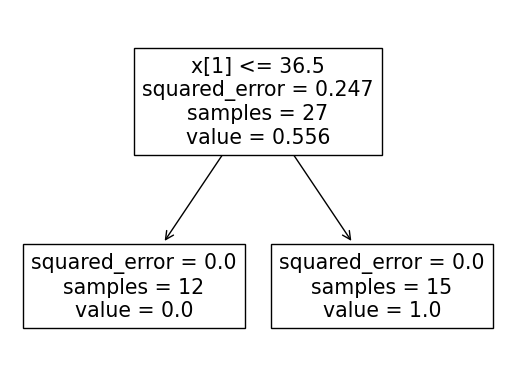

In [13]:
from sklearn import tree
tree.plot_tree(dt_reg)

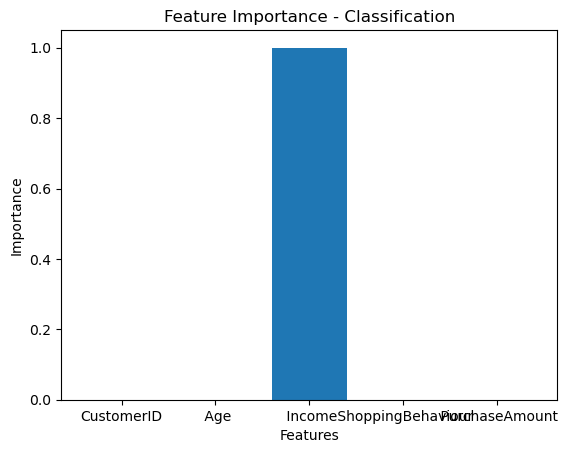

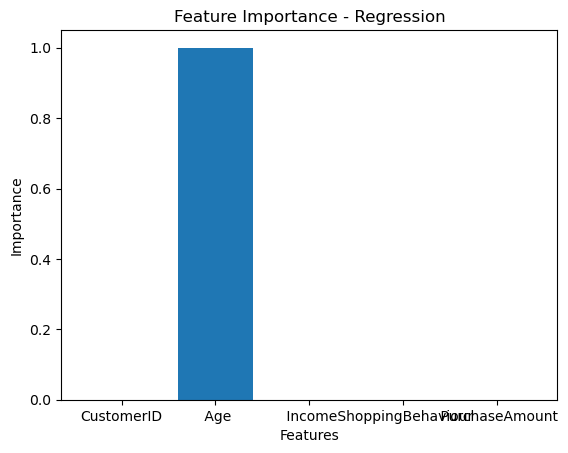

In [15]:

# For Classification
feature_importance_classification = dt_clf.feature_importances_

# For Regression
feature_importance_regression = dt_reg.feature_importances_
# For Classification
plt.bar(x.columns, feature_importance_classification)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Classification')
plt.show()

# For Regression
plt.bar(x.columns, feature_importance_regression)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Regression')
plt.show()

# Build the Decision Tree model with criterion =GINI index method

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)


****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 1 0 0 1 0 0 0 1 0]

Testing completed
****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.9
Confusion Matric:
 [[6 0]
 [1 3]]
Classification Report
               precision    reca

# Build the Decision Tree model with criterion =entropy index method

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)


****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 1 0 0 1 0 0 0 1 0]

Testing completed
****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.9
Confusion Matric:
 [[6 0]
 [1 3]]
Classification Report
               precision    r

# Build the Decision Tree model with max_depth

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={ 'max_depth':[3,4,5,6,7,8,10]}
clf=DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)

3


In [19]:
grid_search.best_params_


{'max_depth': 3}

In [20]:
grid_search.cv_results_

{'mean_fit_time': array([0.00552588, 0.00413527, 0.00395904, 0.00398259, 0.00421243,
        0.00338588, 0.00383325]),
 'std_fit_time': array([0.00128809, 0.00041461, 0.00047511, 0.00024146, 0.00077872,
        0.00073974, 0.00027823]),
 'mean_score_time': array([0.00724854, 0.00608058, 0.00578823, 0.00482574, 0.00541534,
        0.00461516, 0.00547686]),
 'std_score_time': array([0.00157925, 0.00112212, 0.00040648, 0.0001678 , 0.00040861,
        0.00052712, 0.00067503]),
 'param_max_depth': masked_array(data=[3, 4, 5, 6, 7, 8, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 10}],
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split2_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split3_

In [21]:
grid_search.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
grid_search.best_index_

0

In [23]:
grid_search.classes_

array([0, 1], dtype=int64)

In [24]:
grid_search.cv

5

In [25]:
grid_search.feature_names_in_

array(['CustomerID', ' Age', ' Income', ' ShoppingBehaviour',
       ' PurchaseAmount'], dtype=object)

In [26]:
grid_search.n_splits_

5

In [27]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
# Assuming you have a trained decision tree classifier named 'dt_clf'
feature_importance = dt_clf.feature_importances_

# Now you can associate the feature importances with feature names
feature_names = ['CustomerID', 'Age', 'Income', 'ShoppingBehaviour', 'PurchaseAmount']
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.4f}')


Age: 1.0000
CustomerID: 0.0000
Income: 0.0000
ShoppingBehaviour: 0.0000
PurchaseAmount: 0.0000


In [29]:
# Assuming you have a trained decision tree regressor named 'dt_reg'
feature_importance = dt_reg.feature_importances_

# Now you can associate the feature importances with feature names
feature_names = ['CustomerID', 'Age', 'Income', 'ShoppingBehaviour', 'PurchaseAmount']
feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most important features
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.4f}')


Age: 1.0000
CustomerID: 0.0000
Income: 0.0000
ShoppingBehaviour: 0.0000
PurchaseAmount: 0.0000


--->Overfitting in the context of decision trees occurs when a tree is too complex and captures noise or random variations in the training data, rather than the true underlying patterns. In other words, an overfit tree is tailored too closely to the training data and fails to generalize well to new, unseen data. The key characteristics of an overfit decision tree are:

It may have many levels of depth, resulting in a complex and deep tree.
It may create decision nodes that split the data based on very specific and noisy features.
It captures outliers or noise in the training data.
It exhibits high variance, which means it's sensitive to small changes in the training data.

--->To reduce overfitting in decision trees, several techniques and hyperparameters can be used:

Pruning: Pruning involves removing branches from the tree that do not provide significant improvements in predictive accuracy. Pruning reduces the tree's complexity and helps it generalize better to new data.

Minimum Samples per Leaf (min_samples_leaf): This hyperparameter sets the minimum number of samples required in a leaf node. Setting a higher value encourages the tree to create smaller leaf nodes, which reduces overfitting.

Maximum Depth (max_depth): Limiting the maximum depth of the tree restricts the complexity of the tree. This prevents it from becoming too deep and capturing noise in the training data.

Minimum Samples per Split (min_samples_split): This hyperparameter sets the minimum number of samples required to split an internal node. Increasing this value discourages the creation of small, noisy splits.

Maximum Features (max_features): Limiting the number of features considered for each split can help prevent overfitting.

Cross-Validation: Use cross-validation to estimate the model's performance on unseen data. Cross-validation helps identify the optimal tree complexity and hyperparameter settings that minimize overfitting.

In [31]:
from sklearn.tree import DecisionTreeClassifier
pru_dt_clf=DecisionTreeClassifier(random_state=42,max_depth=5)
print('*'*100)
print('Decison Tree Pruned classifier')
print('*'*100)
print('\n Training Phase')
pru_dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',pru_dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=pru_dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree Pruned classifier
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 1 0 0 1 0 0 0 1 0]

Testing completed
****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.9
Confusion Matric:
 [[6 0]
 [1 3]]
Classification Report
               precision 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
pru_dt_reg= DecisionTreeRegressor(random_state=42,max_depth=5)
pru_dt_reg.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = pru_dt_reg.predict(xtest)

# Evaluate the model's performance
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

Mean Squared Error (MSE): 0.10
R-squared (R^2): 0.58


Practical Applications of Customer Satisfaction Prediction and Sales Forecasting in the Retail Industry:

Customer Satisfaction Prediction:

Customer Retention: Identifying dissatisfied customers allows retailers to address their concerns and improve satisfaction, reducing churn.
Product and Service Improvement: Feedback from customer satisfaction prediction can guide product development and service enhancements.
Personalization: Tailoring marketing and offers to individual preferences boosts customer loyalty and sales.
Sales Forecasting:

Inventory Management: Accurate sales forecasts optimize inventory levels, preventing overstock or stockouts.
Staffing and Resource Allocation: Forecasting helps retailers schedule staff and allocate resources efficiently.
Promotion Planning: Anticipating sales trends informs strategic pricing and promotional campaigns for maximum impact.

The potential benefits of using predictive models in retail business operations and decision-making include:

Demand Forecasting: Predictive models help optimize inventory management, reducing carrying costs and minimizing stockouts, ultimately increasing profitability.

Customer Segmentation: Targeted marketing and personalized recommendations enhance customer satisfaction and loyalty, driving sales.

Price Optimization: Models inform pricing strategies to maximize revenue and profits while remaining competitive.

Inventory Optimization: Minimizing excess stock reduces waste, improves cash flow, and ensures products are readily available when customers demand them.

Fraud Detection: Predictive models identify fraudulent activities and protect the retail business from financial losses.

Optimized Supply Chain: Streamlined supply chain operations lead to cost reductions and efficient product delivery.

Employee Productivity: Predictive analytics improve staff scheduling, leading to enhanced operational efficiency and customer service.

Market Basket Analysis: Understanding customer purchase patterns allows for effective cross-selling and upselling.

Risk Management: Predictive models can help manage financial risks and optimize credit decisions.

Competitive Advantage: Utilizing data-driven insights provides a competitive edge in a rapidly evolving industry.

we can compare two models by checking these:
Decision Tree Classification Model Evaluation:
Accuracy,Precision, Recall,F1-Score,Confusion Matrix

Decision Tree Regression Model Evaluation:
Mean Absolute Error (MAE),Mean Squared Error (MSE),R-squared (R^2)

-->Advantages:

Interpretability: Decision trees are highly interpretable, making them suitable for explaining decision logic to non-technical stakeholders.

Feature Importance: Decision trees can identify the most important features, aiding in feature selection and understanding data.

Non-Parametric: They don't make strong assumptions about data distribution and can handle both categorical and numerical features.

-->Limitations:

Overfitting: Decision trees are prone to overfitting, especially when not properly pruned, leading to poor generalization.

Instability: Small changes in data can result in different tree structures, making them less robust.

Limited Expressiveness: Decision trees may struggle to capture complex relationships in data compared to more advanced models.

-->Trade-offs by Task:

Classification:

Advantage: Decision trees are useful for interpretable binary or multi-class classification tasks with relatively simple decision boundaries.
Trade-off: They may underperform in highly imbalanced datasets and tasks with complex decision boundaries.
Regression:

Advantage: Decision trees are effective for regression tasks when relationships between features and the target variable are non-linear.
Trade-off: They may struggle with extrapolation beyond the training data range and require careful handling of outliers.
Anomaly Detection:

Advantage: Decision trees can be used for anomaly detection by identifying unusual data points based on decision paths.
Trade-off: They may not be the best choice for tasks with rare and subtle anomalies.
Feature Selection:

Advantage: Decision trees can help identify important features for subsequent modeling.
Trade-off: They may not be the most efficient method for high-dimensional datasets.
Time Series Forecasting:

Advantage: Decision trees can handle time series data with periodic patterns.
Trade-off: They may not capture long-term dependencies as well as specialized time series models.
